# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [106]:
#IMPORTAÇÕES DE PACOTES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
#DADOS
data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']}



A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

In [108]:
# AJUSTES (1)
df = pd.DataFrame(data)
df['Estado_Civil'] = df['Estado_Civil'].replace({'Casamento': 'Casados','Solteiro': 'Solteiros'})

# AJUSTES (2)
df['Imovel_Proprio'] = df['Imovel_Proprio'].replace({'0': 'Não possuí', '1': 'Possuem'})

# AJUSTES (3)
df['Historico Inadimplencia'] = df['Historico Inadimplencia'].astype(float)
df['Historico Inadimplencia'] = df['Historico Inadimplencia'].replace({0: 'Adimplente', 1: 'Inadimplente'})
df['Limite_Credito'] = df['Limite_Credito'].astype(float)

# AJUSTE(4)
df['Salário'] = df['Salário'].str.replace(',', '').astype(float)

df


,Nome,Idade,Profissão,Salário,Limite_Credito,Historico Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500.0,2500.0,Adimplente,Casados,Não possuí
1,Joao,30,Médico,8000.0,4000.0,Adimplente,Casados,Não possuí
2,Charlie,35,Professor,5000.0,4000.0,Adimplente,Solteiros,Não possuí
3,David,40,Advogado,10000.0,1000.0,Inadimplente,Solteiros,Possuem
4,Eva,45,Médico,12000.0,10000.0,Adimplente,Casados,Possuem
5,Diego,60,Engenheiro,15000.0,2000.0,Inadimplente,Solteiros,Possuem
6,Denize,22,Estudante,1200.0,500.0,Adimplente,Solteiros,Não possuí
7,Claudio,24,Estudante,1500.0,250.0,Inadimplente,Solteiros,Não possuí


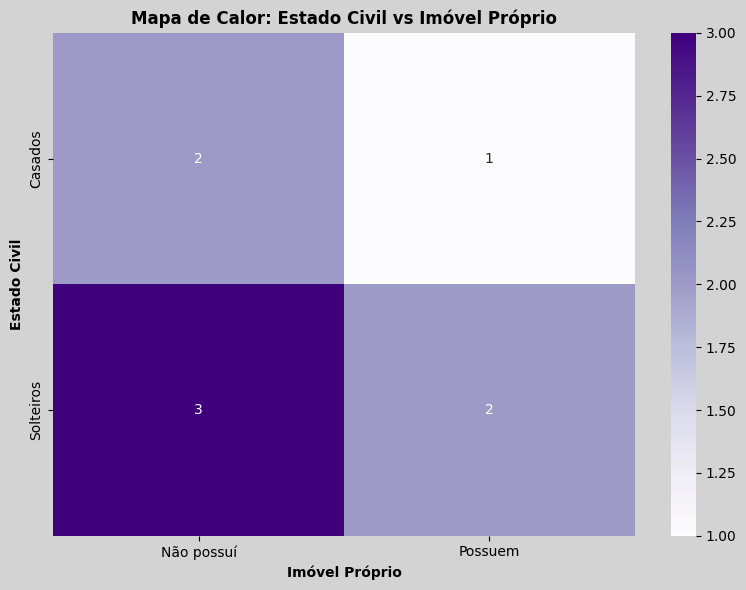

In [143]:
#Gráfico Compartivo de Estado Civil	vs Imóvel Próprio

# Tabela de contingência
crosstab = pd.crosstab(df['Estado_Civil'], df['Imovel_Proprio'])

# Gráfico de Mapa de calor com fundo cinza
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(crosstab, cmap='Purples', annot=True, fmt='d', ax=ax)
ax.set_title('Mapa de Calor: Estado Civil vs Imóvel Próprio', fontweight='bold')
ax.set_xlabel('Imóvel Próprio', fontweight='bold')
ax.set_ylabel('Estado Civil', fontweight='bold')
fig.patch.set_facecolor('lightgray')  # Define a cor de fundo da figura para cinza claro
plt.tight_layout()
plt.show()


Neste gráfico, visualizamos que a maior proporção refere-se aos solteiros sem imóvel próprio (37,5%), que correspondem a quase metade das pessoas avaliadas.

Por outro lado, os casados correspondem somente a 12,5%, com imóvel.

Observa-se uma equiparação entre os percentuais de solteiros com imóvel e casados sem imóvel.

Totalizando 62,5% dos clientes sem imóvel próprio, independentemente do estado civil.

Portanto, solteiros são mais propensos a comprar imóveis.

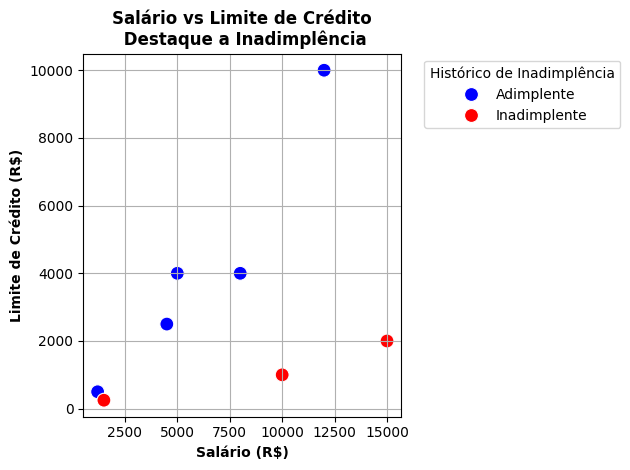

In [133]:
# Gráfico de dispersão

ax = sns.scatterplot(
    data=df,
    x='Salário',
    y='Limite_Credito',
    hue='Historico Inadimplencia',  # Nome da coluna CORRETO
    palette={'Adimplente': 'blue', 'Inadimplente': 'red'},
    s=100
)


# Título e rótulos do gráfico
plt.title("Salário vs Limite de Crédito\n Destaque a Inadimplência", fontweight='bold')
plt.xlabel("Salário (R$)",fontweight='bold')
plt.ylabel("Limite de Crédito (R$)",fontweight='bold')


# Adicionando grade
plt.grid(True)

# Posicionando a legenda fora do gráfico
plt.legend(title='Histórico de Inadimplência', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustando layout para acomodar a legenda fora
plt.tight_layout()

# Ajustando layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

A avaliação da ligação entre limite de crédito e salário é fundamental para a gestão do risco financeiro, possibilitando a compreensão de como o aumento salarial influencia a probabilidade de inadimplência.

Enquanto o aumento do limite de crédito não impacta de forma negativa a inadimplência.

Os adimplentes possuem uma média de limite de crédito de aproximadamente R$4.000,00 e o salário é de aproximadamente R$ 5.500,00.

Enquanto os inadimplentes possuem uma média de limite de crédito de aproximadamente R$1.000,00 e o salário é de aproximadamente até R$ 7.500,00. Observa-se também que os limites de crédito disponibilizados estão abaixo dos valores dos salários.

A quantidade de adimplentes mostra-se superior à de inadimplentes, onde o comportamento do cliente tende a ser mais positivo.

Desta forma, aumentar o limite de crédito do cliente pode reduzir a inadimplência

/tmp/ipykernel_5356/1228679639.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_salario_profissao.index, y=media_salario_profissao.values, palette='viridis')


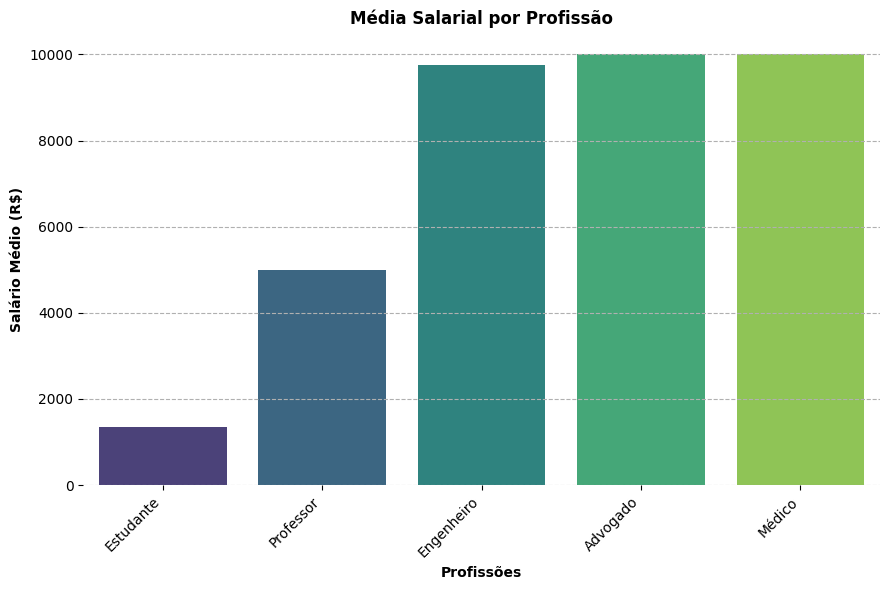

In [144]:
# Gráfico de Barras

# Calcula a média salarial por profissão
media_salario_profissao = df.groupby('Profissão')['Salário'].mean().sort_values()


# Cria o gráfico de barras
plt.figure(figsize=(9,6))
sns.barplot(x=media_salario_profissao.index, y=media_salario_profissao.values, palette='viridis')
plt.title('Média Salarial por Profissão', fontweight='bold')
plt.xlabel('Profissões', fontweight='bold')
plt.ylabel('Salário Médio (R$)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.show()

Adimplentes demonstram maior limite de crédito médio (R$4.000) e menor salário médio (R$5.500) em comparação com inadimplentes (limite de R$700,00 e salário acima de R$9.000,00).

Em ambos os grupos, o limite de crédito médio é inferior ao salário médio. A análise por profissão sugere que salários mais altos geralmente se associam a maior inadimplência, embora estudantes apresentem uma proporção considerável de adimplentes com menor renda, indicando a influência de outros fatores além da capacidade financeira.